In [14]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [15]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [16]:
column_list_file = 'houseprices_column_list.txt'
train_file = 'houseprices_train.csv'
validation_file = 'houseprices_validation.csv'
test_file = 'houseprices_test.csv'

In [17]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [13]:
columns

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enclos

In [18]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file)
df_validation = pd.read_csv(validation_file)

In [19]:
df_train.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,756,60,3,68.0,10769,1,0,3,0,4,0,5,2,2,0,5,8,5,2007,2007,1,1,12,13,2,0.0,2,4,2,2,3,0,2,20,5,0,846,866,1,0,1,4,866,902,0,1768,0,0,2,1,3,1,2,7,6,0,5,1,2007.0,1,2,578,4,4,2,144,105,0,0,0,0,3,4,4,0,4,2009,8,4,212000
1,923,120,3,50.0,8012,1,3,3,0,4,0,20,2,2,4,2,6,5,1993,1994,1,1,9,10,2,0.0,2,4,2,2,3,3,3,165,2,841,598,1604,1,0,1,4,1617,0,0,1617,1,0,2,0,2,1,2,5,6,1,1,1,1993.0,1,2,533,4,4,2,0,69,0,0,0,0,3,4,4,0,7,2008,8,4,193000
2,1423,80,3,NaN,19690,1,0,3,0,1,0,7,2,2,0,7,6,7,1966,1966,0,5,9,10,2,0.0,2,2,1,2,3,0,5,0,5,0,697,697,1,4,1,4,1575,626,0,2201,0,0,2,0,4,1,2,8,6,1,2,1,1966.0,2,2,432,2,2,2,586,236,0,0,0,738,2,0,4,0,8,2006,8,2,274970
3,217,70,4,57.0,9906,1,3,3,0,4,0,17,2,2,0,5,4,4,1925,1950,1,1,8,8,2,0.0,3,4,1,3,3,3,5,0,5,0,686,686,1,1,0,4,810,518,0,1328,0,0,1,0,3,1,3,8,6,0,5,5,1940.0,2,1,210,4,4,2,0,172,60,0,0,0,3,4,4,0,9,2006,8,3,107000
4,653,50,4,60.0,10320,1,3,3,0,4,0,9,2,2,0,0,6,7,1906,1995,1,1,8,8,2,0.0,3,4,1,3,3,3,5,0,5,0,756,756,1,0,1,4,756,713,0,1469,0,0,1,0,3,1,3,7,6,0,5,5,1906.0,2,1,216,4,4,2,57,0,239,0,0,0,3,2,4,0,6,2008,8,4,135000


In [20]:
X_train = df_train.drop(columns='SalePrice') # Features: 1st column onwards 
y_train = df_train.iloc[:,-1].ravel() # Target: 0th column
X_train = X_train.iloc[:,1:]
X_validation = df_validation.drop(columns='SalePrice')
X_validation = X_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,-1].ravel()

In [28]:
X_validation.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       

In [25]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)

In [26]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_round=150, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [29]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[18:44:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:177709	validation_1-rmse:184613
[1]	validation_0-rmse:161147	validation_1-rmse:168482
[2]	validation_0-rmse:146164	validation_1-rmse:154082
[3]	validation_0-rmse:132768	validation_1-rmse:141064
[4]	validation_0-rmse:120498	validation_1-rmse:129320
[5]	validation_0-rmse:109452	validation_1-rmse:118899
[6]	validation_0-rmse:99539.8	validation_1-rmse:109480
[7]	validation_0-rmse:90735.3	validation_1-rmse:100993
[8]	validation_0-rmse:82649.4	validation_1-rmse:93294.3
[9]	validation_0-rmse:75556.2	validation_1-rmse:86806
[10]	validation_0-rmse:69083.9	validation_1-rmse:80793.2
[11]	validation_0-rmse:63215	validation_1-rmse:75643.6
[12]	validation_0-rmse:57848.4	validation_1-rmse:70813.5
[13]	validation_0-rmse:53052	validation_1-rmse:66265.1
[14]	validation_0-rmse:48857.1	validation_1-rmse:62759.3
[15]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_round=150, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [30]:
eval_result = regressor.evals_result()

In [31]:
df_train['SalePrice'].describe()

count      1168.000000
mean     180389.851027
std       77438.011346
min       34900.000000
25%      129975.000000
50%      161875.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [32]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [33]:
print(training_rounds)

range(0, 100)


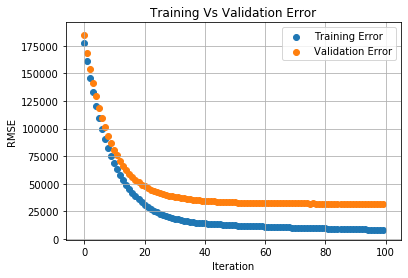

In [34]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

In [35]:

def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

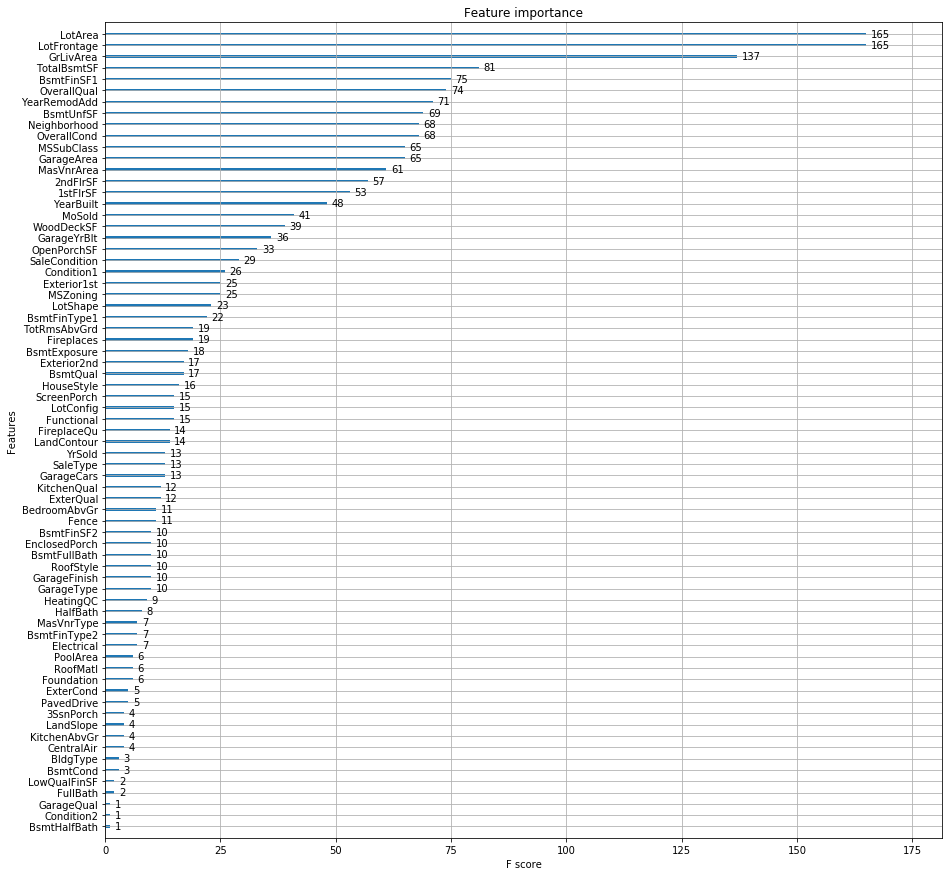

In [36]:
fig, ax = plt.subplots(figsize=(15,15))
xgb.plot_importance(regressor, ax=ax)

In [42]:
X_test=pd.read_csv('houseprices_test.csv')

In [43]:
X_test.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,5,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,2,3,0,6,2010,8,4
1,1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,5,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4
2,2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,2,3,0,3,2010,8,4
3,3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,4,3,0,6,2010,8,4
4,4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,5,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,4,3,0,1,2010,8,4


In [44]:
X_test=X_test.iloc[:,1:]

In [54]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,5,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,2,3,0,6,2010,8,4,121465.906250,1461
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,5,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4,159929.125000,1462
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,2,3,0,3,2010,8,4,178337.718750,1463
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,4,3,0,6,2010,8,4,181006.640625,1464
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,5,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,4,3,0,1,2010,8,4,202560.953125,1465


In [46]:
result = regressor.predict(X_test)

In [47]:
X_test['SalePrice']=result

In [48]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,5,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,2,3,0,6,2010,8,4,121465.906250
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,5,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4,159929.125000
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,2,3,0,3,2010,8,4,178337.718750
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,4,3,0,6,2010,8,4,181006.640625
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,5,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,4,3,0,1,2010,8,4,202560.953125


In [49]:
X_test['SalePrice'].describe()

count      1459.000000
mean     177912.218750
std       73926.140625
min       43766.210938
25%      128597.855469
50%      157667.765625
75%      210137.859375
max      498095.500000
Name: SalePrice, dtype: float64

In [52]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [53]:
X_test['Id']=df_test['Id']

In [57]:
X_test[['Id','SalePrice']].to_csv('predicted_sample.csv',index=False)

In [58]:
X_test.shape[0]

1459